In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn. preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import tensorflow as tf

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv("../data/weatherAUS.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.drop_duplicates(inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
floatdata = data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am','WindDir3pm','RainToday','RainTomorrow' ], axis=1)

In [ ]:
categordata = data.drop(floatdata.columns, axis=1)

In [ ]:
categordata.drop(["WindDir9am", "WindDir3pm"], axis=1, inplace=True)

In [ ]:
floatdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Cloud9am       89572 non-null   float64
 13  Cloud3pm       86102 non-null   float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
dtypes: float64(16)
memory usage: 17.8 MB


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
newdata =  pd.DataFrame(imputer.fit_transform(floatdata), columns=floatdata.columns)

In [ ]:
newdata.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
def heatmap(corr):
    correlation_matrix = newdata.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap (correlation_matrix, annot=True, ax=ax)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

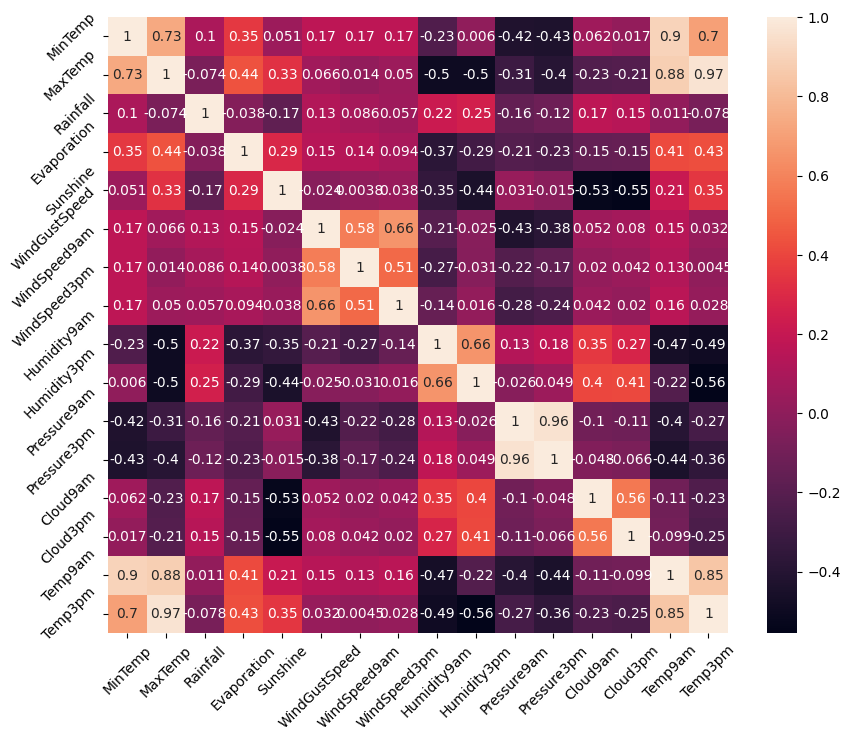

In [ ]:
heatmap(newdata.corr())



In [ ]:
newdata.drop(['Temp9am','Temp3pm', ],axis=1, inplace=True)
newdata['AvgTemp'] = newdata['MaxTemp']+ newdata['MinTemp'] / 2
newdata['AvgWindSpeed'] = newdata['WindSpeed9am']+ newdata['WindSpeed3pm'] / 2
newdata['AvgCloud'] = newdata['Cloud9am']+ newdata['Cloud3pm'] / 2
newdata['AvgPlesure'] = newdata['Pressure9am']+ newdata['Pressure3pm'] / 2
newdata['AvgHumidity'] = newdata['Humidity9am']+ newdata['Humidity3pm'] / 2
newdata.drop(['MaxTemp', 'MinTemp','WindSpeed9am', 'WindSpeed3pm','WindGustSpeed','Cloud9am','Cloud3pm' ,'Humidity3pm', 'Humidity9am','Pressure9am','Pressure3pm'],axis=1 ,inplace=True)

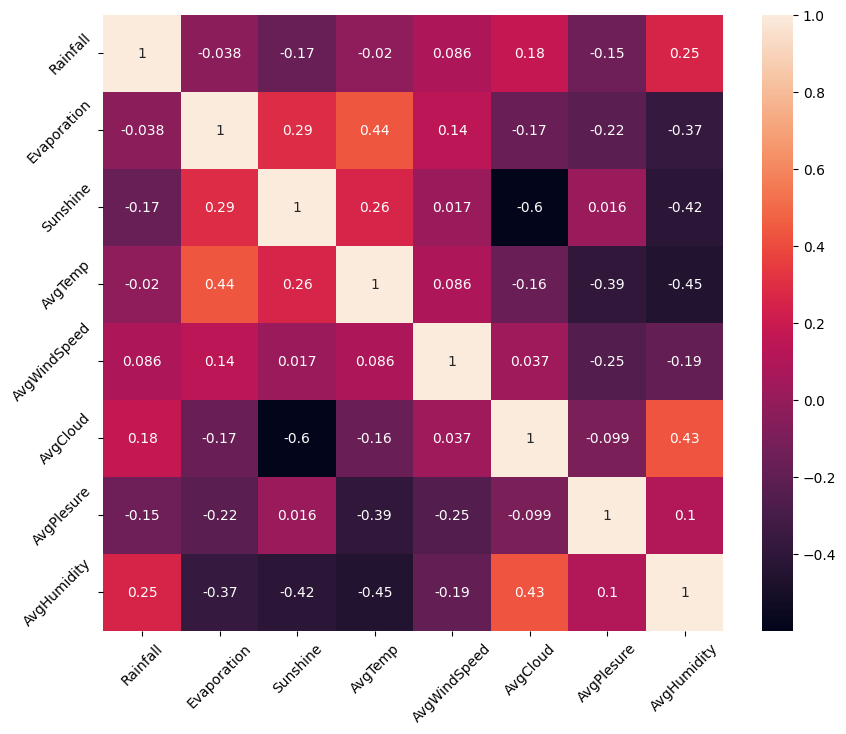

In [ ]:
heatmap(newdata.corr())

In [ ]:
df = categordata.join(newdata) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  object 
 1   Location      145460 non-null  object 
 2   WindGustDir   135134 non-null  object 
 3   RainToday     142199 non-null  object 
 4   RainTomorrow  142193 non-null  object 
 5   Rainfall      145460 non-null  float64
 6   Evaporation   145460 non-null  float64
 7   Sunshine      145460 non-null  float64
 8   AvgTemp       145460 non-null  float64
 9   AvgWindSpeed  145460 non-null  float64
 10  AvgCloud      145460 non-null  float64
 11  AvgPlesure    145460 non-null  float64
 12  AvgHumidity   145460 non-null  float64
dtypes: float64(8), object(5)
memory usage: 14.4+ MB


In [ ]:
df.dropna(inplace=True)
df.columns

Index(['Date', 'Location', 'WindGustDir', 'RainToday', 'RainTomorrow',
       'Rainfall', 'Evaporation', 'Sunshine', 'AvgTemp', 'AvgWindSpeed',
       'AvgCloud', 'AvgPlesure', 'AvgHumidity'],
      dtype='object')

In [ ]:
X = df.drop(['RainTomorrow' ], axis=1)
y = df['RainTomorrow']

In [ ]:
df["RainTomorrow"] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df["RainToday"] = df['RainToday'].map({'Yes': 1, 'No': 0})
df

,Date,Location,WindGustDir,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,AvgTemp,AvgWindSpeed,AvgCloud,AvgPlesure,AvgHumidity
0,2008-12-01,Albury,W,0,0,0.6,5.468232,7.611178,29.60,32.0,10.254965,1511.25,82.0
1,2008-12-02,Albury,WNW,0,0,0.0,5.468232,7.611178,28.80,15.0,6.702426,1514.50,56.5
2,2008-12-03,Albury,WSW,0,0,0.0,5.468232,7.611178,32.15,32.0,5.447461,1511.95,53.0
3,2008-12-04,Albury,NE,0,0,0.0,5.468232,7.611178,32.60,15.5,6.702426,1524.00,53.0
4,2008-12-05,Albury,W,0,0,1.0,5.468232,7.611178,41.05,17.0,11.000000,1513.80,98.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,0,0,0.0,5.468232,7.611178,23.55,21.5,6.702426,1535.30,72.5
145455,2017-06-21,Uluru,E,0,0,0.0,5.468232,7.611178,24.80,18.5,6.702426,1534.75,63.0
145456,2017-06-22,Uluru,NNW,0,0,0.0,5.468232,7.611178,27.10,17.5,6.702426,1533.05,66.5
145457,2017-06-23,Uluru,N,0,0,0.0,5.468232,7.611178,29.60,13.5,6.702426,1529.40,65.0


In [ ]:
X = df.drop(['RainTomorrow' , ], axis=1)
y = df['RainTomorrow']

In [ ]:
df.drop(["Date"], axis=1, inplace=True)

In [ ]:
undersampler = RandomOverSampler()
X_under_sample, y_under_sample = undersampler.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sample, y_under_sample, test_size=0.3, random_state=3, stratify=y)

In [ ]:
def makepipeline(model):
    steps = [
    ('onehot', OneHotEncoder(handle_unknown = "ignore",sparse_output=False)),  
    ('scaler', StandardScaler(with_mean=False)), 
    ('classifier', model) ]
    pipeline = Pipeline(steps)
    return pipeline

In [ ]:
def makepipeline_():
    steps = [
    ('onehot', OneHotEncoder(handle_unknown = "ignore",sparse_output=False)),  
    ('scaler', StandardScaler(with_mean=False)), 
    ('pca', PCA(20))]
    pipeline = Pipeline(steps)
    return pipeline

In [ ]:

# pipeline = makepipeline_()
# df =  pipeline.fit_transform(X, y)

In [ ]:
# df = pd.DataFrame(df, )

array([[ 0.99652849, -1.00260081, -0.06795014, ...,  0.35800814,
        -0.06920419,  0.11361692],
       [ 0.57638355, -2.60589978, -0.04591517, ...,  0.32409607,
        -0.17879301, -0.22031861],
       [-0.14041095, -2.09575857, -0.07296226, ..., -0.60550602,
         0.04747344, -0.68870808],
       ...,
       [ 0.88850937, -2.84611623, -0.05080307, ..., -0.30317073,
        -0.28814061,  0.09909543],
       [ 0.65228102, -3.03291417, -0.04979316, ..., -0.31473817,
        -0.12889624, -0.17139018],
       [-0.24922058, -2.55449041, -0.05523543, ..., -0.3621874 ,
        -0.3510116 , -0.10976521]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


search = makepipeline(BaggingClassifier()) 
search.fit(X_train,y_train)
pred= search.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred))

KeyboardInterrupt: 

In [ ]:
model_classification_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(300,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_classification_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")
search = makepipeline(model_classification_1) 
search.fit(X_train,y_train)
pred= search.predict(X_test)


1806/1806 [==============================] - 1s 346us/step


In [ ]:
print(classification_report(y_true=y_test, y_pred=np.around(pred)))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     28921
           1       0.74      0.77      0.75     28870

    accuracy                           0.75     57791
   macro avg       0.75      0.75      0.75     57791
weighted avg       0.75      0.75      0.75     57791

